In [1]:
import os

import pandas
import numpy

%matplotlib widget
import matplotlib
import matplotlib.pyplot

import seaborn
import scipy.stats

import math

import datetime
import pytz

In [2]:
root_path = '/Users/matthieu/.ssh/ssh_to_graz/saved_graz_data/beetle/'

data_path = root_path + '1feeder/'
conf_path = root_path + 'config/'

data_file = data_path + '1feeder_exp_result_5mins.csv'

In [3]:
# From google sheets spreadsheet
data_raw = pandas.read_csv(data_file)

datetime_objects    = []
starttime_objects   = []
type_objects        = []

for ind, dat in data_raw.iterrows():

    dt_str          = dat.Date
    start_time_str  = dat.Time

    
    if dat.type == 'Ctrl' :
        type_dat    = 0
    elif dat.type == 'Vibs':
        type_dat    = 1
    else :
        type_dat    = -1


    datetime_objects.append(pytz.utc.localize(datetime.datetime.strptime(dt_str, "%d.%m.%y")))
    starttime_objects.append(pytz.utc.localize(datetime.datetime.strptime(dt_str+'T'+start_time_str, "%d.%m.%yT%H:%M:%S")))
    type_objects.append(type_dat)


data_raw['dt'] = datetime_objects
data_raw['dtts_start'] = starttime_objects
data_raw['type_hr'] = data_raw['type']
data_raw['type'] = type_objects
data_raw

# data_raw.to_csv('/Users/matthieu/Desktop/1feeder_5mins.csv')

,Date,Time,Exp_id,Vibrate,type,visits,recruits,removed,dt,dtts_start,type_hr
0,17.07.23,09:00:00,NaN,0.0,-1,25,0,0,2023-07-17 00:00:00+00:00,2023-07-17 09:00:00+00:00,None
1,17.07.23,09:05:00,NaN,0.0,-1,14,0,0,2023-07-17 00:00:00+00:00,2023-07-17 09:05:00+00:00,None
2,17.07.23,09:10:00,1.0,0.0,0,8,0,13,2023-07-17 00:00:00+00:00,2023-07-17 09:10:00+00:00,Ctrl
3,17.07.23,09:15:00,1.0,0.0,0,9,0,7,2023-07-17 00:00:00+00:00,2023-07-17 09:15:00+00:00,Ctrl
4,17.07.23,09:20:00,1.0,0.0,0,4,0,0,2023-07-17 00:00:00+00:00,2023-07-17 09:20:00+00:00,Ctrl
...,...,...,...,...,...,...,...,...,...,...,...
939,27.07.23,13:25:00,32.0,1.0,1,3,0,0,2023-07-27 00:00:00+00:00,2023-07-27 13:25:00+00:00,Vibs
940,27.07.23,13:30:00,32.0,1.0,1,4,0,0,2023-07-27 00:00:00+00:00,2023-07-27 13:30:00+00:00,Vibs
941,27.07.23,13:35:00,32.0,1.0,1,6,0,0,2023-07-27 00:00:00+00:00,2023-07-27 13:35:00+00:00,Vibs
942,27.07.23,13:40:00,32.0,1.0,1,3,0,0,2023-07-27 00:00:00+00:00,2023-07-27 13:40:00+00:00,Vibs


In [4]:
exp_duration = datetime.timedelta(minutes=120)
data_raw = data_raw.replace('#', 0)
data_clean = data_raw[data_raw.type_hr != 'None'].fillna(0)

data_120mins = []
count_nb_periods = 0
start_timestamp = pytz.utc.localize(datetime.datetime(1994, 3, 26, 6, 25, 0))
stop_timestamp = []
data_point = {}
for dat_i, dat in data_clean.iterrows():
    if dat.dtts_start < start_timestamp + exp_duration:
        count_nb_periods += 1

        data_point['duration']          += datetime.timedelta(minutes=5)
        data_point['count_agregation']  = count_nb_periods
        if count_nb_periods != 2:
            data_point['visits']            += int(dat.visits)
        data_point['removed']           += int(dat.removed)
        data_point['recruits']          += int(dat.recruits)
        data_point['dtts_stop']         = data_point['dtts_start'] + data_point['duration']
    else :
        data_120mins.append(data_point)
        count_nb_periods = 1
        start_timestamp = dat.dtts_start
        data_point = {}
        data_point['exp_nb']            = int(dat.Exp_id)
        data_point['dt']                = dat['dt']
        data_point['dtts_start']        = dat.dtts_start
        data_point['dtts_stop']         = []
        data_point['type']              = dat.type
        data_point['type_hr']           = dat.type_hr
        data_point['duration']          = datetime.timedelta(minutes=5)
        data_point['count_agregation']  = 1
        data_point['visits']            = int(dat.visits)
        data_point['removed']           = int(dat.removed)
        data_point['recruits']          = int(dat.recruits)

data_120mins.append(data_point)
    
data = pandas.DataFrame.from_dict(data_120mins[1:])
data
# data.to_csv('/Users/matthieu/Desktop/1feeder_aggdata.csv')

,exp_nb,dt,dtts_start,dtts_stop,type,type_hr,duration,count_agregation,visits,removed,recruits
0,1,2023-07-17 00:00:00+00:00,2023-07-17 09:10:00+00:00,2023-07-17 11:10:00+00:00,0,Ctrl,0 days 02:00:00,24,99,20,12
1,2,2023-07-17 00:00:00+00:00,2023-07-17 11:10:00+00:00,2023-07-17 13:10:00+00:00,1,Vibs,0 days 02:00:00,24,66,10,1
2,3,2023-07-17 00:00:00+00:00,2023-07-17 16:40:00+00:00,2023-07-17 18:40:00+00:00,1,Vibs,0 days 02:00:00,24,127,58,3
3,4,2023-07-18 00:00:00+00:00,2023-07-18 09:10:00+00:00,2023-07-18 11:10:00+00:00,1,Vibs,0 days 02:00:00,24,107,22,6
4,5,2023-07-18 00:00:00+00:00,2023-07-18 11:40:00+00:00,2023-07-18 13:40:00+00:00,0,Ctrl,0 days 02:00:00,24,89,36,14
5,6,2023-07-19 00:00:00+00:00,2023-07-19 10:00:00+00:00,2023-07-19 12:00:00+00:00,0,Ctrl,0 days 02:00:00,24,206,47,9
6,7,2023-07-19 00:00:00+00:00,2023-07-19 12:10:00+00:00,2023-07-19 14:10:00+00:00,0,Ctrl,0 days 02:00:00,24,92,36,6
7,8,2023-07-19 00:00:00+00:00,2023-07-19 14:20:00+00:00,2023-07-19 16:20:00+00:00,1,Vibs,0 days 02:00:00,24,162,13,0
8,9,2023-07-20 00:00:00+00:00,2023-07-20 09:10:00+00:00,2023-07-20 11:10:00+00:00,1,Vibs,0 days 02:00:00,24,180,18,2
9,10,2023-07-20 00:00:00+00:00,2023-07-20 11:20:00+00:00,2023-07-20 13:20:00+00:00,0,Ctrl,0 days 02:00:00,24,87,34,2


In [5]:
days_to_discard_str = ['23/07/22', '23/07/25']#, '23/07/24', '23/07/26']
# 22 System problems
# 25 Storm
# 24 Bad food ?
# 26 Bad food ? 
days_to_discard = [pytz.utc.localize(datetime.datetime.strptime(x, '%y/%m/%d')) for x in days_to_discard_str]

data_cleaned = data
for d in days_to_discard:
    data_cleaned = data_cleaned[data_cleaned.dt != d]

data_cleaned['exp_re_nb'] = range(1, len(data_cleaned)+1)

all_dates = data_cleaned.dt.unique()
all_dates_occurences = dict.fromkeys(all_dates, 0)
trials_by_date = []
for _, row in data_cleaned.iterrows():
    all_dates_occurences[row['dt']] += 1
    trials_by_date.append(all_dates_occurences[row['dt']])

data_cleaned['trial_id']=trials_by_date
data_cleaned

,exp_nb,dt,dtts_start,dtts_stop,type,type_hr,duration,count_agregation,visits,removed,recruits,exp_re_nb,trial_id
0,1,2023-07-17 00:00:00+00:00,2023-07-17 09:10:00+00:00,2023-07-17 11:10:00+00:00,0,Ctrl,0 days 02:00:00,24,99,20,12,1,1
1,2,2023-07-17 00:00:00+00:00,2023-07-17 11:10:00+00:00,2023-07-17 13:10:00+00:00,1,Vibs,0 days 02:00:00,24,66,10,1,2,2
2,3,2023-07-17 00:00:00+00:00,2023-07-17 16:40:00+00:00,2023-07-17 18:40:00+00:00,1,Vibs,0 days 02:00:00,24,127,58,3,3,3
3,4,2023-07-18 00:00:00+00:00,2023-07-18 09:10:00+00:00,2023-07-18 11:10:00+00:00,1,Vibs,0 days 02:00:00,24,107,22,6,4,1
4,5,2023-07-18 00:00:00+00:00,2023-07-18 11:40:00+00:00,2023-07-18 13:40:00+00:00,0,Ctrl,0 days 02:00:00,24,89,36,14,5,2
5,6,2023-07-19 00:00:00+00:00,2023-07-19 10:00:00+00:00,2023-07-19 12:00:00+00:00,0,Ctrl,0 days 02:00:00,24,206,47,9,6,1
6,7,2023-07-19 00:00:00+00:00,2023-07-19 12:10:00+00:00,2023-07-19 14:10:00+00:00,0,Ctrl,0 days 02:00:00,24,92,36,6,7,2
7,8,2023-07-19 00:00:00+00:00,2023-07-19 14:20:00+00:00,2023-07-19 16:20:00+00:00,1,Vibs,0 days 02:00:00,24,162,13,0,8,3
8,9,2023-07-20 00:00:00+00:00,2023-07-20 09:10:00+00:00,2023-07-20 11:10:00+00:00,1,Vibs,0 days 02:00:00,24,180,18,2,9,1
9,10,2023-07-20 00:00:00+00:00,2023-07-20 11:20:00+00:00,2023-07-20 13:20:00+00:00,0,Ctrl,0 days 02:00:00,24,87,34,2,10,2


Ranksums test for all data : RanksumsResult(statistic=-1.2853753986084415, pvalue=0.19866113381369221)
Ranksums test for cleaned data : RanksumsResult(statistic=-2.2057470084576485, pvalue=0.02740171849986683)
Ranksums test for removed cleaned data : RanksumsResult(statistic=0.1556997888323046, pvalue=0.8762696636277617)
Ranksums test for visits cleaned data : RanksumsResult(statistic=-0.4930493313022979, pvalue=0.6219777311487266)


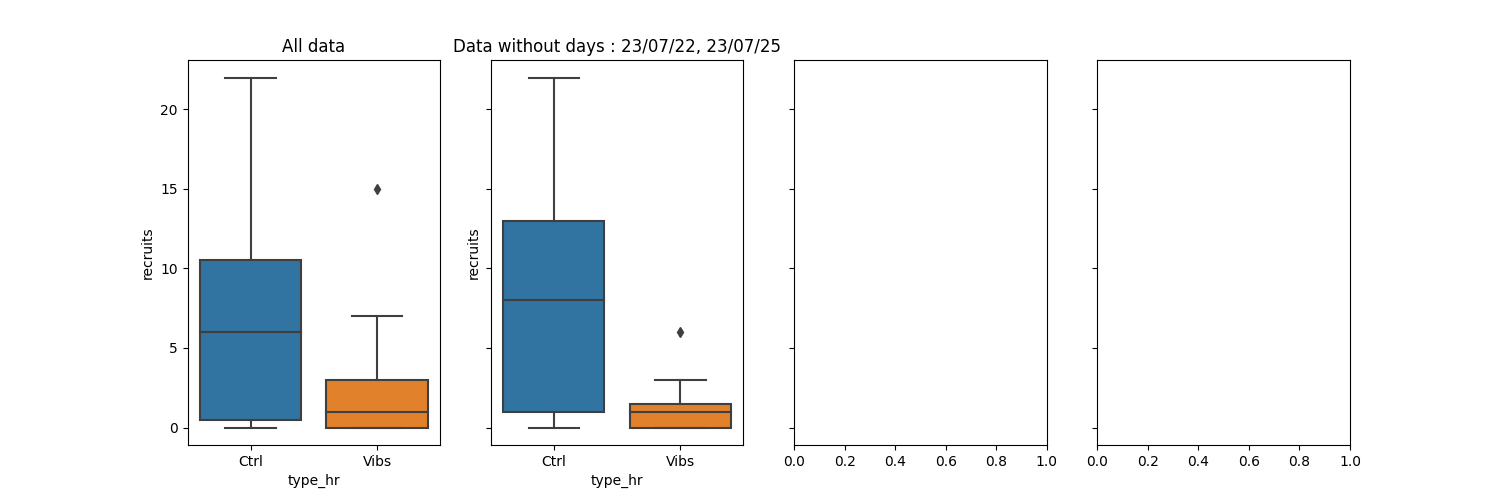

In [6]:
fig, ax = matplotlib.pyplot.subplots(1, 4, figsize=(15,5), sharey=True)

ax[0].set_title('All data')
# _ =matplotlib.pyplot.boxplot([data[data.type == 1].recruits, data[data.type == 0].recruits])
seaborn.boxplot(data=data, y='recruits', x='type_hr', ax=ax[0])
# seaborn.relplot(data=data, x='type', y='recruits', kind='scatter', alpha=0.3)

# matplotlib.pyplot.figure(figsize=(8, 5))
ax[1].set_title('Data without days : ' + ', '.join(days_to_discard_str))
# _ =matplotlib.pyplot.boxplot([data[data.type == 1].recruits, data[data.type == 0].recruits])
seaborn.boxplot(data=data_cleaned, y='recruits', x='type_hr', ax=ax[1])
# seaborn.relplot(data=data, x='type', y='recruits', kind='scatter', alpha=0.3)

# ax[2].set_title('REMOVED : Data without days : ' + ', '.join(days_to_discard_str)) ## not reliable at all !! Data relevant for period before experiment
# seaborn.boxplot(data=data_cleaned, y='removed', x='type_hr', ax=ax[2])

# ax[3].set_title('VISITS : Data without days : ' + ', '.join(days_to_discard_str))
# seaborn.boxplot(data=data_cleaned, y='visits', x='type_hr', ax=ax[3])

# Wilcoxon rank-sum
print('Ranksums test for all data : {}'.format(scipy.stats.ranksums(data[data.type == 1].recruits, data[data.type == 0].recruits)))
print('Ranksums test for cleaned data : {}'.format(scipy.stats.ranksums(data_cleaned[data_cleaned.type == 1].recruits, data_cleaned[data_cleaned.type == 0].recruits)))
print('Ranksums test for removed cleaned data : {}'.format(scipy.stats.ranksums(data_cleaned[data_cleaned.type == 1].removed, data_cleaned[data_cleaned.type == 0].removed)))
print('Ranksums test for visits cleaned data : {}'.format(scipy.stats.ranksums(data_cleaned[data_cleaned.type == 1].visits, data_cleaned[data_cleaned.type == 0].visits)))

In [7]:
data_cleaned

,exp_nb,dt,dtts_start,dtts_stop,type,type_hr,duration,count_agregation,visits,removed,recruits,exp_re_nb,trial_id
0,1,2023-07-17 00:00:00+00:00,2023-07-17 09:10:00+00:00,2023-07-17 11:10:00+00:00,0,Ctrl,0 days 02:00:00,24,99,20,12,1,1
1,2,2023-07-17 00:00:00+00:00,2023-07-17 11:10:00+00:00,2023-07-17 13:10:00+00:00,1,Vibs,0 days 02:00:00,24,66,10,1,2,2
2,3,2023-07-17 00:00:00+00:00,2023-07-17 16:40:00+00:00,2023-07-17 18:40:00+00:00,1,Vibs,0 days 02:00:00,24,127,58,3,3,3
3,4,2023-07-18 00:00:00+00:00,2023-07-18 09:10:00+00:00,2023-07-18 11:10:00+00:00,1,Vibs,0 days 02:00:00,24,107,22,6,4,1
4,5,2023-07-18 00:00:00+00:00,2023-07-18 11:40:00+00:00,2023-07-18 13:40:00+00:00,0,Ctrl,0 days 02:00:00,24,89,36,14,5,2
5,6,2023-07-19 00:00:00+00:00,2023-07-19 10:00:00+00:00,2023-07-19 12:00:00+00:00,0,Ctrl,0 days 02:00:00,24,206,47,9,6,1
6,7,2023-07-19 00:00:00+00:00,2023-07-19 12:10:00+00:00,2023-07-19 14:10:00+00:00,0,Ctrl,0 days 02:00:00,24,92,36,6,7,2
7,8,2023-07-19 00:00:00+00:00,2023-07-19 14:20:00+00:00,2023-07-19 16:20:00+00:00,1,Vibs,0 days 02:00:00,24,162,13,0,8,3
8,9,2023-07-20 00:00:00+00:00,2023-07-20 09:10:00+00:00,2023-07-20 11:10:00+00:00,1,Vibs,0 days 02:00:00,24,180,18,2,9,1
9,10,2023-07-20 00:00:00+00:00,2023-07-20 11:20:00+00:00,2023-07-20 13:20:00+00:00,0,Ctrl,0 days 02:00:00,24,87,34,2,10,2


In [8]:
data_none = data_raw[data_raw.type!=1].fillna(0)

data_none_agreg = []
count_nb_periods = 0
start_timestamp = pytz.utc.localize(datetime.datetime(1994, 3, 26, 6, 25, 0))
data_point = {}

for dat_i, dat in data_none.iterrows():
    if dat['dt'] == start_timestamp.date():
        count_nb_periods += 1

        data_point['count_agregation']  = count_nb_periods
        data_point['visits']            += int(dat.visits)
        data_point['removed']           += int(dat.removed)
        data_point['recruits']          += int(dat.recruits)
    else :
        data_none_agreg.append(data_point)
        count_nb_periods = 1
        start_timestamp = dat.dtts_start
        data_point = {}
        data_point['dt']                = dat['dt']
        data_point['dtts_start']        = dat.dtts_start
        data_point['count_agregation']  = 1
        data_point['visits']            = int(dat.visits)
        data_point['removed']           = int(dat.removed)
        data_point['recruits']          = int(dat.recruits)

data_none_agreg.append(data_point)

data_none_agreg = pandas.DataFrame.from_dict(data_none_agreg[1:])
data_none_agreg['recruits_rate'] = data_none_agreg.recruits/(data_none_agreg.count_agregation*5)
data_none_agreg['visits_rate'] = data_none_agreg.visits/(data_none_agreg.count_agregation*5)
data_none_agreg

/var/folders/gp/4448rp494v37dvsvd0rwbyvw0000gn/T/ipykernel_40891/1646750516.py:9: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if dat['dt'] == start_timestamp.date():


,dt,dtts_start,count_agregation,visits,removed,recruits,recruits_rate,visits_rate
0,2023-07-17 00:00:00+00:00,2023-07-17 09:00:00+00:00,69,216,20,12,0.034783,0.626087
1,2023-07-18 00:00:00+00:00,2023-07-18 11:10:00+00:00,30,106,36,14,0.093333,0.706667
2,2023-07-19 00:00:00+00:00,2023-07-19 10:00:00+00:00,52,357,83,16,0.061538,1.373077
3,2023-07-20 00:00:00+00:00,2023-07-20 11:10:00+00:00,62,218,41,4,0.012903,0.703226
4,2023-07-21 00:00:00+00:00,2023-07-21 09:20:00+00:00,65,220,31,21,0.064615,0.676923
5,2023-07-22 00:00:00+00:00,2023-07-22 11:10:00+00:00,43,225,29,23,0.106977,1.046512
6,2023-07-23 00:00:00+00:00,2023-07-23 09:10:00+00:00,67,411,19,46,0.137313,1.226866
7,2023-07-24 00:00:00+00:00,2023-07-24 10:45:00+00:00,70,333,29,8,0.022857,0.951429
8,2023-07-25 00:00:00+00:00,2023-07-25 12:00:00+00:00,81,336,30,1,0.002469,0.829630
9,2023-07-26 00:00:00+00:00,2023-07-26 11:30:00+00:00,65,355,16,17,0.052308,1.092308


In [9]:
data

,exp_nb,dt,dtts_start,dtts_stop,type,type_hr,duration,count_agregation,visits,removed,recruits
0,1,2023-07-17 00:00:00+00:00,2023-07-17 09:10:00+00:00,2023-07-17 11:10:00+00:00,0,Ctrl,0 days 02:00:00,24,99,20,12
1,2,2023-07-17 00:00:00+00:00,2023-07-17 11:10:00+00:00,2023-07-17 13:10:00+00:00,1,Vibs,0 days 02:00:00,24,66,10,1
2,3,2023-07-17 00:00:00+00:00,2023-07-17 16:40:00+00:00,2023-07-17 18:40:00+00:00,1,Vibs,0 days 02:00:00,24,127,58,3
3,4,2023-07-18 00:00:00+00:00,2023-07-18 09:10:00+00:00,2023-07-18 11:10:00+00:00,1,Vibs,0 days 02:00:00,24,107,22,6
4,5,2023-07-18 00:00:00+00:00,2023-07-18 11:40:00+00:00,2023-07-18 13:40:00+00:00,0,Ctrl,0 days 02:00:00,24,89,36,14
5,6,2023-07-19 00:00:00+00:00,2023-07-19 10:00:00+00:00,2023-07-19 12:00:00+00:00,0,Ctrl,0 days 02:00:00,24,206,47,9
6,7,2023-07-19 00:00:00+00:00,2023-07-19 12:10:00+00:00,2023-07-19 14:10:00+00:00,0,Ctrl,0 days 02:00:00,24,92,36,6
7,8,2023-07-19 00:00:00+00:00,2023-07-19 14:20:00+00:00,2023-07-19 16:20:00+00:00,1,Vibs,0 days 02:00:00,24,162,13,0
8,9,2023-07-20 00:00:00+00:00,2023-07-20 09:10:00+00:00,2023-07-20 11:10:00+00:00,1,Vibs,0 days 02:00:00,24,180,18,2
9,10,2023-07-20 00:00:00+00:00,2023-07-20 11:20:00+00:00,2023-07-20 13:20:00+00:00,0,Ctrl,0 days 02:00:00,24,87,34,2


Ranksums test for all data : RanksumsResult(statistic=-2.6255251575525183, pvalue=0.008651541533947532)
Ranksums test for cleaned data : RanksumsResult(statistic=-2.4916186034997656, pvalue=0.012716250355070739)


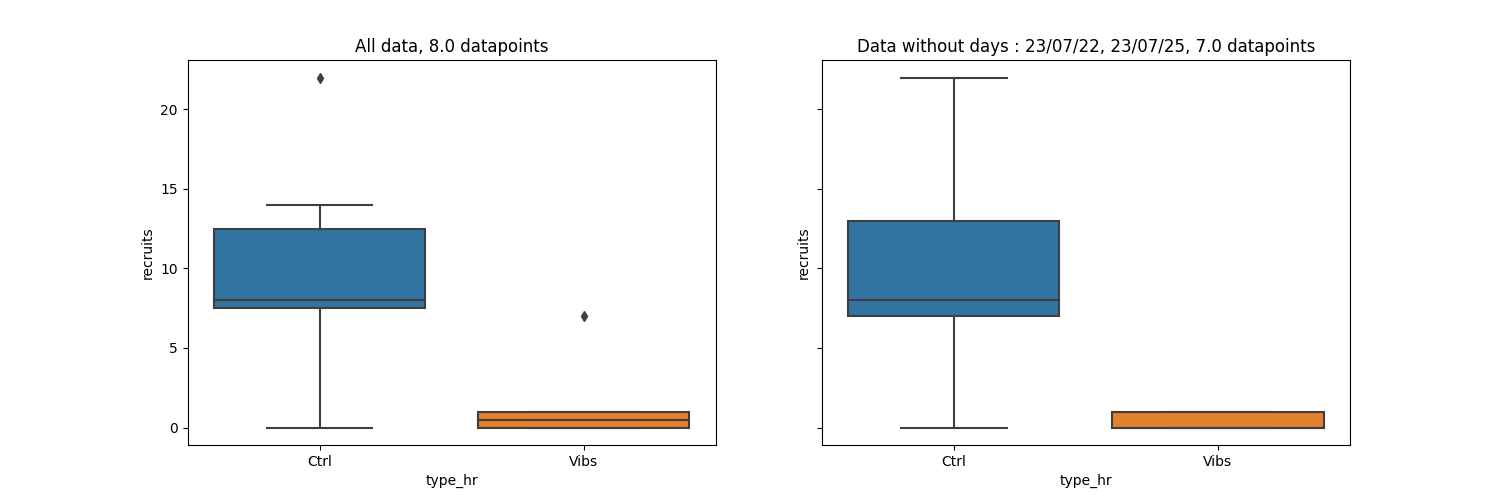

In [10]:
list_of_btb_ctl = [1, 7, 13, 16, 18, 20, 28, 31]
list_of_btb_exp = [2, 8, 14, 17, 19, 21, 29, 32]

data_btb            = data[data.exp_nb.isin(list_of_btb_ctl+list_of_btb_exp)]
data_cleaned_btb    = data_cleaned[data_cleaned.exp_nb.isin(list_of_btb_ctl+list_of_btb_exp)]

fig, ax = matplotlib.pyplot.subplots(1, 2, figsize=(15,5), sharey=True)
ax[0].set_title('All data, {} datapoints'.format(len(data_btb)/2))
# _ =matplotlib.pyplot.boxplot([data[data.type == 1].recruits, data[data.type == 0].recruits])
seaborn.boxplot(data=data_btb, y='recruits', x='type_hr', ax=ax[0])
# seaborn.relplot(data=data, x='type', y='recruits', kind='scatter', alpha=0.3)

# matplotlib.pyplot.figure(figsize=(8, 5))
ax[1].set_title('Data without days : ' + ', '.join(days_to_discard_str) + ', {} datapoints'.format(len(data_cleaned_btb)/2))
# _ =matplotlib.pyplot.boxplot([data[data.type == 1].recruits, data[data.type == 0].recruits])
seaborn.boxplot(data=data_cleaned_btb, y='recruits', x='type_hr', ax=ax[1])

# Wilcoxon rank-sum
print('Ranksums test for all data : {}'.format(scipy.stats.ranksums(data_btb[data_btb.type == 1].recruits, data_btb[data_btb.type == 0].recruits)))
print('Ranksums test for cleaned data : {}'.format(scipy.stats.ranksums(data_cleaned_btb[data_cleaned_btb.type == 1].recruits, data_cleaned_btb[data_cleaned_btb.type == 0].recruits)))

In [11]:
data_cleaned

,exp_nb,dt,dtts_start,dtts_stop,type,type_hr,duration,count_agregation,visits,removed,recruits,exp_re_nb,trial_id
0,1,2023-07-17 00:00:00+00:00,2023-07-17 09:10:00+00:00,2023-07-17 11:10:00+00:00,0,Ctrl,0 days 02:00:00,24,99,20,12,1,1
1,2,2023-07-17 00:00:00+00:00,2023-07-17 11:10:00+00:00,2023-07-17 13:10:00+00:00,1,Vibs,0 days 02:00:00,24,66,10,1,2,2
2,3,2023-07-17 00:00:00+00:00,2023-07-17 16:40:00+00:00,2023-07-17 18:40:00+00:00,1,Vibs,0 days 02:00:00,24,127,58,3,3,3
3,4,2023-07-18 00:00:00+00:00,2023-07-18 09:10:00+00:00,2023-07-18 11:10:00+00:00,1,Vibs,0 days 02:00:00,24,107,22,6,4,1
4,5,2023-07-18 00:00:00+00:00,2023-07-18 11:40:00+00:00,2023-07-18 13:40:00+00:00,0,Ctrl,0 days 02:00:00,24,89,36,14,5,2
5,6,2023-07-19 00:00:00+00:00,2023-07-19 10:00:00+00:00,2023-07-19 12:00:00+00:00,0,Ctrl,0 days 02:00:00,24,206,47,9,6,1
6,7,2023-07-19 00:00:00+00:00,2023-07-19 12:10:00+00:00,2023-07-19 14:10:00+00:00,0,Ctrl,0 days 02:00:00,24,92,36,6,7,2
7,8,2023-07-19 00:00:00+00:00,2023-07-19 14:20:00+00:00,2023-07-19 16:20:00+00:00,1,Vibs,0 days 02:00:00,24,162,13,0,8,3
8,9,2023-07-20 00:00:00+00:00,2023-07-20 09:10:00+00:00,2023-07-20 11:10:00+00:00,1,Vibs,0 days 02:00:00,24,180,18,2,9,1
9,10,2023-07-20 00:00:00+00:00,2023-07-20 11:20:00+00:00,2023-07-20 13:20:00+00:00,0,Ctrl,0 days 02:00:00,24,87,34,2,10,2


# Figures

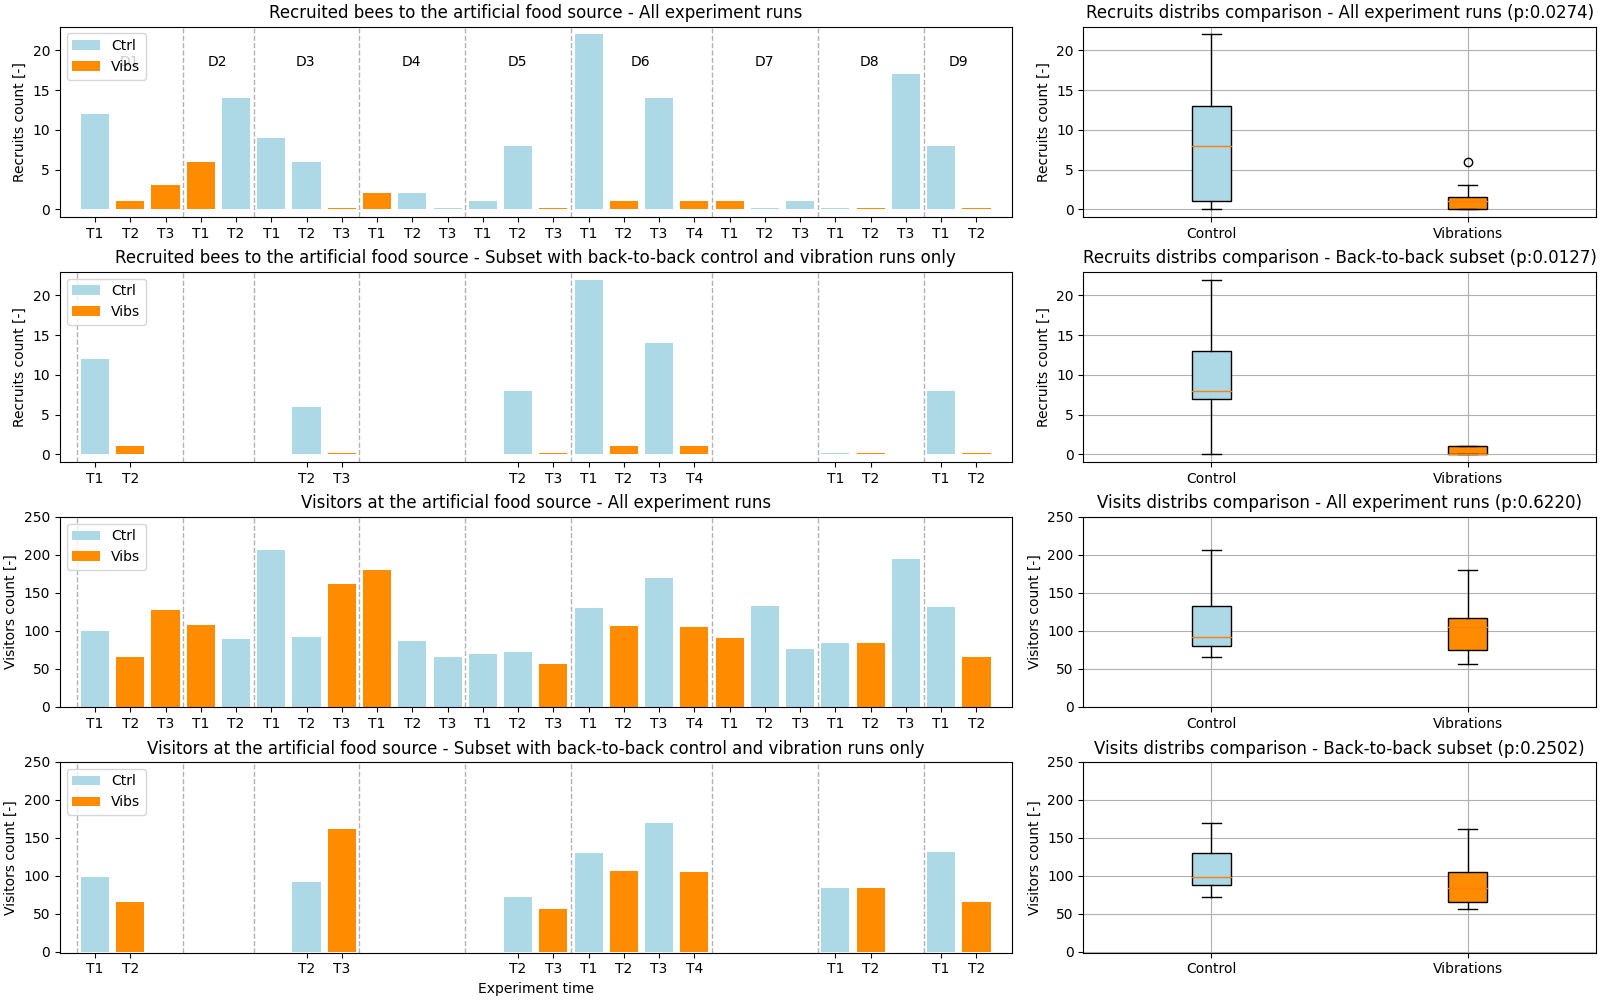

In [12]:
fig, ax = matplotlib.pyplot.subplots(4, 2, figsize=(16,10), height_ratios=[30, 30, 30, 30], width_ratios=[65, 35], constrained_layout=True)


ZERO_LEVEL_DISPLAY  = 0.2
ROTATION_TIMES      = 0
TICKS_HIDING_CT     = 2

VLINES_COLOR        = 'k'
VLINES_ALPHA        = 0.3
VLINES_LW           = 1
VLINES_LS           = 'dashed'
TEXT_DAY_OFFSET_X   = -0.3
TEXT_DAY_OFFSET_Y   = -5

YLIM_RECRUITS   = [-1, 23]
YLIM_VISITS     = [-1, 250]

XLIM_EXP = [0, 27]

## Recruitment all
data_cleaned_show0 = data_cleaned.copy()
# extract data
data_cleaned_show0.loc[:, 'recruits'] = data_cleaned_show0.loc[:, 'recruits'].replace(0, ZERO_LEVEL_DISPLAY)
# colors and legend
colors = ['lightblue' if x.type==0 else 'darkorange' for _, x in data_cleaned_show0.iterrows()]
labels = ['Ctrl', 'Vibs'] + ['_'+x for x in data_cleaned_show0.type_hr.values][2:]
# plot
_ = ax[0,0].bar(data_cleaned_show0.exp_re_nb, data_cleaned_show0.recruits, color=colors, label=labels)
# ticks
_ = ax[0,0].set_xticks(data_cleaned_show0.exp_re_nb.values)
_ = ax[0,0].set_xticklabels(['T'+str(x) for x in data_cleaned_show0.trial_id], rotation=ROTATION_TIMES)
# _ = ax[0,0].set_xticklabels([x.strftime("%m-%dT%H:%M") for x in data_cleaned_show0.dtts_start], rotation=ROTATION_TIMES)
# _ = [x.label1.set_visible(False) for x_id, x in enumerate(ax[0,0].xaxis.get_major_ticks()) if (x_id+1)%TICKS_HIDING_CT==0]
# Day lines
day_separator_pos = [x-0.5 for x in data_cleaned[data_cleaned.trial_id == 1].exp_re_nb]
_ = ax[0,0].vlines(day_separator_pos[1:], YLIM_RECRUITS[0], YLIM_RECRUITS[1], color=VLINES_COLOR, alpha=VLINES_ALPHA, linestyles=VLINES_LS, linewidths=VLINES_LW)
day_tags_pos = [(x+day_separator_pos[k+1])/2 if (k < len(day_separator_pos)-1) else (x+data_cleaned.trial_id.iloc[-1]/2) for k,x in enumerate(day_separator_pos) ]
_ = [ax[0,0].text(tag_pos+TEXT_DAY_OFFSET_X, YLIM_RECRUITS[1]+TEXT_DAY_OFFSET_Y, 'D'+str(tp_id+1)) for tp_id, tag_pos in enumerate(day_tags_pos)]
# boxplot
bplot = ax[0,1].boxplot([data_cleaned[data_cleaned.type == 0].recruits, data_cleaned[data_cleaned.type == 1].recruits], labels=['Control', 'Vibrations'], patch_artist=True)
bplot['boxes'][0].set_facecolor('lightblue')
bplot['boxes'][1].set_facecolor('darkorange')

## Visits
# plot
_ = ax[2,0].bar(data_cleaned_show0.exp_re_nb, data_cleaned_show0.visits, color=colors, label=labels)
# ticks
_ = ax[2,0].set_xticks(data_cleaned_show0.exp_re_nb.values)
_ = ax[2,0].set_xticklabels(['T'+str(x) for x in data_cleaned_show0.trial_id], rotation=ROTATION_TIMES)
# _ = ax[2,0].set_xticklabels([x.strftime("%m-%dT%H:%M") for x in data_cleaned_show0.dtts_start], rotation=ROTATION_TIMES)
# _ = [x.label1.set_visible(False) for x_id, x in enumerate(ax[2,0].xaxis.get_major_ticks()) if (x_id+1)%TICKS_HIDING_CT==0]
# Day lines
_ = ax[2,0].vlines(day_separator_pos, YLIM_VISITS[0], YLIM_VISITS[1], color=VLINES_COLOR, alpha=VLINES_ALPHA, linestyles=VLINES_LS, linewidths=VLINES_LW)
# boxplot
bplot = ax[2,1].boxplot([data_cleaned[data_cleaned.type == 0].visits, data_cleaned[data_cleaned.type == 1].visits], labels=['Control', 'Vibrations'], patch_artist=True)
bplot['boxes'][0].set_facecolor('lightblue')
bplot['boxes'][1].set_facecolor('darkorange')


## Recruitment B2B
# data
data_btb_show0 = data_cleaned_btb.copy()
data_btb_show0.loc[:, 'recruits'] = data_btb_show0.loc[:, 'recruits'].replace(0, ZERO_LEVEL_DISPLAY)
# colors and labels
colors = ['lightblue' if x.type==0 else 'darkorange' for _, x in data_btb_show0.iterrows()]
labels = ['Ctrl', 'Vibs'] + ['_'+x for x in data_btb_show0.type_hr.values][2:]
# plot
_ = ax[1,0].bar(data_btb_show0.exp_re_nb, data_btb_show0.recruits, color=colors, label=labels)
# ticks
_ = ax[1,0].set_xticks(data_btb_show0.exp_re_nb.values)
_ = ax[1,0].set_xticklabels(['T'+str(x) for x in data_btb_show0.trial_id], rotation=ROTATION_TIMES)
# _ = ax[1,0].set_xticklabels([x.strftime("%m-%dT%H:%M") for x in data_btb_show0.dtts_start], rotation=ROTATION_TIMES)
# Day lines
_ = ax[1,0].vlines(day_separator_pos, YLIM_RECRUITS[0], YLIM_RECRUITS[1], color=VLINES_COLOR, alpha=VLINES_ALPHA, linestyles=VLINES_LS, linewidths=VLINES_LW)
# boxplot
bplot = ax[1,1].boxplot([data_cleaned_btb[data_cleaned_btb.type == 0].recruits, data_cleaned_btb[data_cleaned_btb.type == 1].recruits], labels=['Control', 'Vibrations'], patch_artist=True)
bplot['boxes'][0].set_facecolor('lightblue')
bplot['boxes'][1].set_facecolor('darkorange')

## Visits B2B
# data
_ = ax[3,0].bar(data_btb_show0.exp_re_nb, data_btb_show0.visits, color=colors, label=labels)
# ticks
_ = ax[3,0].set_xticks(data_btb_show0.exp_re_nb.values)
_ = ax[3,0].set_xticklabels(['T'+str(x) for x in data_btb_show0.trial_id], rotation=ROTATION_TIMES)
# _ = ax[3,0].set_xticklabels([x.strftime("%m-%dT%H:%M") for x in data_btb_show0.dtts_start], rotation=ROTATION_TIMES)
# Day lines
_ = ax[3,0].vlines(day_separator_pos, YLIM_VISITS[0], YLIM_VISITS[1], color=VLINES_COLOR, alpha=VLINES_ALPHA, linestyles=VLINES_LS, linewidths=VLINES_LW)
# boxplot
bplot = ax[3,1].boxplot([data_cleaned_btb[data_cleaned_btb.type == 0].visits, data_cleaned_btb[data_cleaned_btb.type == 1].visits], labels=['Control', 'Vibrations'], patch_artist=True)
bplot['boxes'][0].set_facecolor('lightblue')
bplot['boxes'][1].set_facecolor('darkorange')


# # Titles 
_ = ax[0,0].title.set_text('Recruited bees to the artificial food source - All experiment runs')
_ = ax[1,0].title.set_text('Recruited bees to the artificial food source - Subset with back-to-back control and vibration runs only')
_ = ax[2,0].title.set_text('Visitors at the artificial food source - All experiment runs')
_ = ax[3,0].title.set_text('Visitors at the artificial food source - Subset with back-to-back control and vibration runs only')

RStest_all_rec = scipy.stats.ranksums(data_cleaned[data_cleaned.type == 1].recruits, data_cleaned[data_cleaned.type == 0].recruits)
RStest_b2b_rec = scipy.stats.ranksums(data_cleaned_btb[data_cleaned_btb.type == 1].recruits, data_cleaned_btb[data_cleaned_btb.type == 0].recruits)
RStest_all_vis = scipy.stats.ranksums(data_cleaned[data_cleaned.type == 1].visits, data_cleaned[data_cleaned.type == 0].visits)
RStest_b2b_vis = scipy.stats.ranksums(data_cleaned_btb[data_cleaned_btb.type == 1].visits, data_cleaned_btb[data_cleaned_btb.type == 0].visits)

_ = ax[0,1].title.set_text('Recruits distribs comparison - All experiment runs (p:{1:1.4f})'.format(RStest_all_rec[0], RStest_all_rec[1]))
_ = ax[1,1].title.set_text('Recruits distribs comparison - Back-to-back subset (p:{1:1.4f})'.format(RStest_b2b_rec[0], RStest_b2b_rec[1]))
_ = ax[2,1].title.set_text('Visits distribs comparison - All experiment runs (p:{1:1.4f})'.format(RStest_all_vis[0], RStest_all_vis[1]))
_ = ax[3,1].title.set_text('Visits distribs comparison - Back-to-back subset (p:{1:1.4f})'.format(RStest_b2b_vis[0], RStest_b2b_vis[1]))

# # Axis names
_ = ax[3,0].set_xlabel('Experiment time')

_ = ax[0,0].set_ylabel('Recruits count [-]')
_ = ax[1,0].set_ylabel('Recruits count [-]')
_ = ax[2,0].set_ylabel('Visitors count [-]')
_ = ax[3,0].set_ylabel('Visitors count [-]')

_ = ax[0,1].set_ylabel('Recruits count [-]')
_ = ax[1,1].set_ylabel('Recruits count [-]')
_ = ax[2,1].set_ylabel('Visitors count [-]')
_ = ax[3,1].set_ylabel('Visitors count [-]')

# # Axis limits
_ = ax[0,0].set_ylim(YLIM_RECRUITS)
_ = ax[1,0].set_ylim(YLIM_RECRUITS)
_ = ax[0,1].set_ylim(YLIM_RECRUITS)
_ = ax[1,1].set_ylim(YLIM_RECRUITS)
_ = ax[2,0].set_ylim(YLIM_VISITS)
_ = ax[2,1].set_ylim(YLIM_VISITS)
_ = ax[3,0].set_ylim(YLIM_VISITS)
_ = ax[3,1].set_ylim(YLIM_VISITS)

_ = ax[0,0].set_xlim(XLIM_EXP)
_ = ax[1,0].set_xlim(XLIM_EXP)
_ = ax[2,0].set_xlim(XLIM_EXP)
_ = ax[3,0].set_xlim(XLIM_EXP)

# # Legends
_ = ax[0,0].legend(loc='upper left')
_ = ax[1,0].legend(loc='upper left')
_ = ax[2,0].legend(loc='upper left')
_ = ax[3,0].legend(loc='upper left')
# _ = ax[2,0].legend(loc='upper left')

# # Grids
# _ = ax[0,0].grid()
# _ = ax[1,0].grid()
# _ = ax[2,0].grid()
_ = ax[0,1].grid()
_ = ax[1,1].grid()
_ = ax[2,1].grid()
_ = ax[3,1].grid()

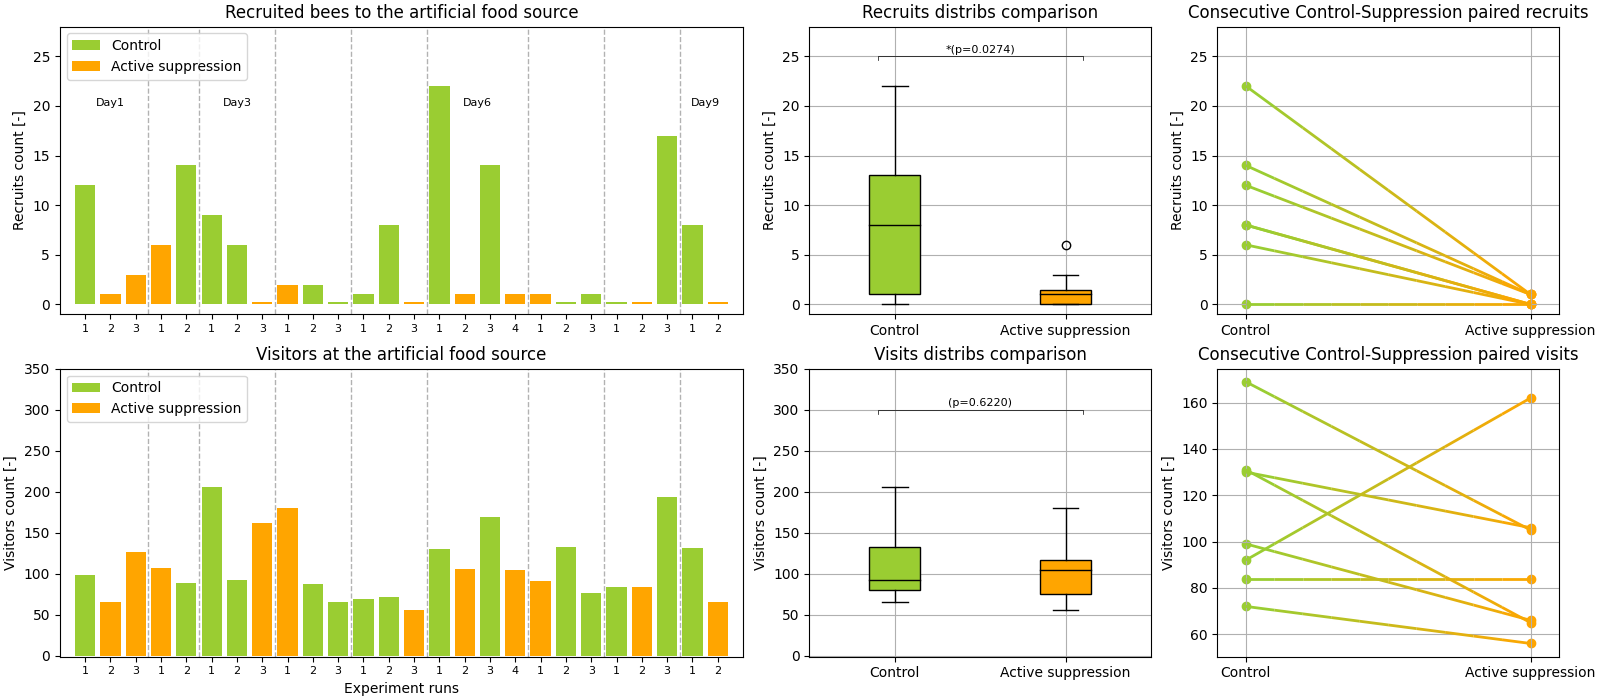

In [13]:
fig, ax = matplotlib.pyplot.subplots(2, 3, figsize=(16,7), height_ratios=[50, 50], width_ratios=[50, 25, 25], constrained_layout=True)


ZERO_LEVEL_DISPLAY  = 0.2
ROTATION_TIMES      = 0
TICKS_HIDING_CT     = 2

COLOR_CONTROL       = 'yellowgreen'
COLOR_VIBS          = 'orange'
COLORMAP_GRAD       = matplotlib.colors.LinearSegmentedColormap.from_list("Custom", [COLOR_CONTROL, COLOR_VIBS], N=30)

VLINES_COLOR        = 'k'
VLINES_ALPHA        = 0.3
VLINES_LW           = 1
VLINES_LS           = 'dashed'
TEXT_DAY_OFFSET_X   = 0
TEXT_DAY_OFFSET_Y   = -8

YLIM_RECRUITS   = [-1, 28]
YLIM_VISITS     = [-1, 350]

XLIM_EXP        = [0, 27]
XLIM_BP         = [-0.1, 1.1]

## Recruitment all
data_cleaned_show0 = data_cleaned.copy()
# extract data
data_cleaned_show0.loc[:, 'recruits'] = data_cleaned_show0.loc[:, 'recruits'].replace(0, ZERO_LEVEL_DISPLAY)
# colors and legend
colors = [COLOR_CONTROL if x.type==0 else COLOR_VIBS for _, x in data_cleaned_show0.iterrows()]
labels = ['Control', 'Active suppression'] + ['_'+x for x in data_cleaned_show0.type_hr.values][2:]
# plot
_ = ax[0,0].bar(data_cleaned_show0.exp_re_nb, data_cleaned_show0.recruits, color=colors, label=labels)
# ticks
_ = ax[0,0].set_xticks(data_cleaned_show0.exp_re_nb.values)
_ = ax[0,0].set_xticklabels([str(x) for x in data_cleaned_show0.trial_id], rotation=ROTATION_TIMES, size=8)
# _ = ax[0,0].set_xticklabels([x.strftime("%m-%dT%H:%M") for x in data_cleaned_show0.dtts_start], rotation=ROTATION_TIMES)
# _ = [x.label1.set_visible(False) for x_id, x in enumerate(ax[0,0].xaxis.get_major_ticks()) if (x_id+1)%TICKS_HIDING_CT==0]
# Day lines
day_separator_pos = [x-0.5 for x in data_cleaned[data_cleaned.trial_id == 1].exp_re_nb]
_ = ax[0,0].vlines(day_separator_pos[1:], YLIM_RECRUITS[0], YLIM_RECRUITS[1], color=VLINES_COLOR, alpha=VLINES_ALPHA, linestyles=VLINES_LS, linewidths=VLINES_LW)
day_tags_pos = [(x+day_separator_pos[k+1])/2 if (k < len(day_separator_pos)-1) else (x+data_cleaned.trial_id.iloc[-1]/2) for k,x in enumerate(day_separator_pos) ]
_ = [ax[0,0].text(tag_pos+TEXT_DAY_OFFSET_X, YLIM_RECRUITS[1]+TEXT_DAY_OFFSET_Y, 'Day'+str(tp_id+1), ha='center', size=8) for tp_id, tag_pos in enumerate(day_tags_pos) if tp_id in [0,2,5,8]]
# boxplot
bplot = ax[0,1].boxplot([data_cleaned[data_cleaned.type == 0].recruits, data_cleaned[data_cleaned.type == 1].recruits], labels=['Control', 'Active suppression'], patch_artist=True, widths=0.30, medianprops=dict(color='black'))
bplot['boxes'][0].set_facecolor(COLOR_CONTROL)
bplot['boxes'][1].set_facecolor(COLOR_VIBS)

## Visits
# plot
_ = ax[1,0].bar(data_cleaned_show0.exp_re_nb, data_cleaned_show0.visits, color=colors, label=labels)
# ticks
_ = ax[1,0].set_xticks(data_cleaned_show0.exp_re_nb.values)
_ = ax[1,0].set_xticklabels([str(x) for x in data_cleaned_show0.trial_id], rotation=ROTATION_TIMES, size=8)
# Day lines
_ = ax[1,0].vlines(day_separator_pos[1:], YLIM_VISITS[0], YLIM_VISITS[1], color=VLINES_COLOR, alpha=VLINES_ALPHA, linestyles=VLINES_LS, linewidths=VLINES_LW)
# boxplot
bplot = ax[1,1].boxplot([data_cleaned[data_cleaned.type == 0].visits, data_cleaned[data_cleaned.type == 1].visits], labels=['Control', 'Active suppression'], patch_artist=True, widths=0.30, medianprops=dict(color='black'))
bplot['boxes'][0].set_facecolor(COLOR_CONTROL)
bplot['boxes'][1].set_facecolor(COLOR_VIBS)


## Recruitment & visitation B2B
# data
ax[0,2].scatter([0]*len(data_cleaned_btb[data_cleaned_btb.type==0]), data_cleaned_btb[data_cleaned_btb.type==0].recruits, color=COLOR_CONTROL)
ax[0,2].scatter([1]*len(data_cleaned_btb[data_cleaned_btb.type==1]), data_cleaned_btb[data_cleaned_btb.type==1].recruits, color=COLOR_VIBS)
ax[1,2].scatter([0]*len(data_cleaned_btb[data_cleaned_btb.type==0]), data_cleaned_btb[data_cleaned_btb.type==0].visits, color=COLOR_CONTROL)
ax[1,2].scatter([1]*len(data_cleaned_btb[data_cleaned_btb.type==1]), data_cleaned_btb[data_cleaned_btb.type==1].visits, color=COLOR_VIBS)
# plot
color_gradient      = matplotlib.pyplot.Normalize(0, 1)
x_segments          = list(numpy.linspace(0, 1, 11))
points_recruits     = [numpy.array([[x, row.recruits + (data_cleaned_btb.loc[row_id+1].recruits-row.recruits)*x] for x in x_segments]) for row_id, row in data_cleaned_btb.iterrows() if row.type == 0]
points_recruits     = [numpy.expand_dims(points_set, axis=1) for points_set in points_recruits]
segments_recruits   = [numpy.concatenate([points_set[:-1], points_set[1:]], axis=1) for points_set in list(points_recruits)]
lines               = [matplotlib.collections.LineCollection(segments_set, cmap=COLORMAP_GRAD, norm=color_gradient) for segments_set in list(segments_recruits)]
_ = [lines_set.set_array(x_segments) for lines_set in lines]
_ = [lines_set.set_linewidth(2) for lines_set in lines]
line = [ax[0,2].add_collection(lines_set) for lines_set in lines]

points_visits       = [numpy.array([[x, row.visits + (data_cleaned_btb.loc[row_id+1].visits-row.visits)*x] for x in x_segments]) for row_id, row in data_cleaned_btb.iterrows() if row.type == 0]
points_visits       = [numpy.expand_dims(points_set, axis=1) for points_set in points_visits]
segments_visits     = [numpy.concatenate([points_set[:-1], points_set[1:]], axis=1) for points_set in list(points_visits)]
lines               = [matplotlib.collections.LineCollection(segments_set, cmap=COLORMAP_GRAD, norm=color_gradient) for segments_set in list(segments_visits)]
_ = [lines_set.set_array(x_segments) for lines_set in lines]
_ = [lines_set.set_linewidth(2) for lines_set in lines]
line = [ax[1,2].add_collection(lines_set) for lines_set in lines]

# ticks
_ = ax[0,2].set_xticks([0, 1])
_ = ax[0,2].set_xticklabels(['Control', 'Active suppression'])
_ = ax[1,2].set_xticks([0, 1])
_ = ax[1,2].set_xticklabels(['Control', 'Active suppression'])

# # Titles 
_ = ax[0,0].title.set_text('Recruited bees to the artificial food source')
_ = ax[1,0].title.set_text('Visitors at the artificial food source')

RStest_all_rec = scipy.stats.ranksums(data_cleaned[data_cleaned.type == 1].recruits, data_cleaned[data_cleaned.type == 0].recruits)
RStest_all_vis = scipy.stats.ranksums(data_cleaned[data_cleaned.type == 1].visits, data_cleaned[data_cleaned.type == 0].visits)

_ = ax[0,1].title.set_text('Recruits distribs comparison')
_ = ax[1,1].title.set_text('Visits distribs comparison')

_ = ax[0,2].title.set_text('Consecutive Control-Suppression paired recruits')
_ = ax[1,2].title.set_text('Consecutive Control-Suppression paired visits')


# # Axis names
_ = ax[1,0].set_xlabel('Experiment runs')

_ = ax[0,0].set_ylabel('Recruits count [-]')
_ = ax[1,0].set_ylabel('Visitors count [-]')

_ = ax[0,1].set_ylabel('Recruits count [-]')
_ = ax[1,1].set_ylabel('Visitors count [-]')

_ = ax[0,2].set_ylabel('Recruits count [-]')
_ = ax[1,2].set_ylabel('Visitors count [-]')

# # Axis limits
_ = ax[0,0].set_ylim(YLIM_RECRUITS)
_ = ax[0,1].set_ylim(YLIM_RECRUITS)
_ = ax[0,2].set_ylim(YLIM_RECRUITS)
_ = ax[1,0].set_ylim(YLIM_VISITS)
_ = ax[1,1].set_ylim(YLIM_VISITS)

_ = ax[0,0].set_xlim(XLIM_EXP)
_ = ax[1,0].set_xlim(XLIM_EXP)
_ = ax[0,2].set_xlim(XLIM_BP)
_ = ax[1,2].set_xlim(XLIM_BP)

# # Legends
_ = ax[0,0].legend(loc='upper left')
_ = ax[1,0].legend(loc='upper left')

# # Grids
_ = ax[0,1].grid()
_ = ax[1,1].grid()
_ = ax[0,2].grid()
_ = ax[1,2].grid()

# significance bars
sb_level    = 25
sb_width    = 1.2
sb_height   = 0.35
sb_positions= [1.5]
_ = ax[0,1].plot([sb_positions[0]-sb_width/2, sb_positions[0]-sb_width/2, sb_positions[0]+sb_width/2, sb_positions[0]+sb_width/2], [sb_level-sb_height, sb_level, sb_level, sb_level-sb_height], 'k', linewidth=.5)
_ = ax[0,1].text(sb_positions[0], sb_level+0.3, '*(p={:1.4f})'.format(RStest_all_rec[1]), fontsize=8, horizontalalignment='center')


sb_level    = 300
sb_width    = 1.2
sb_height   = 5
sb_positions= [1.5]
_ = ax[1,1].plot([sb_positions[0]-sb_width/2, sb_positions[0]-sb_width/2, sb_positions[0]+sb_width/2, sb_positions[0]+sb_width/2], [sb_level-sb_height, sb_level, sb_level, sb_level-sb_height], 'k', linewidth=.5)
_ = ax[1,1].text(sb_positions[0], sb_level+5, '(p={:1.4f})'.format(RStest_all_vis[1]), fontsize=8, horizontalalignment='center')

# Final figs

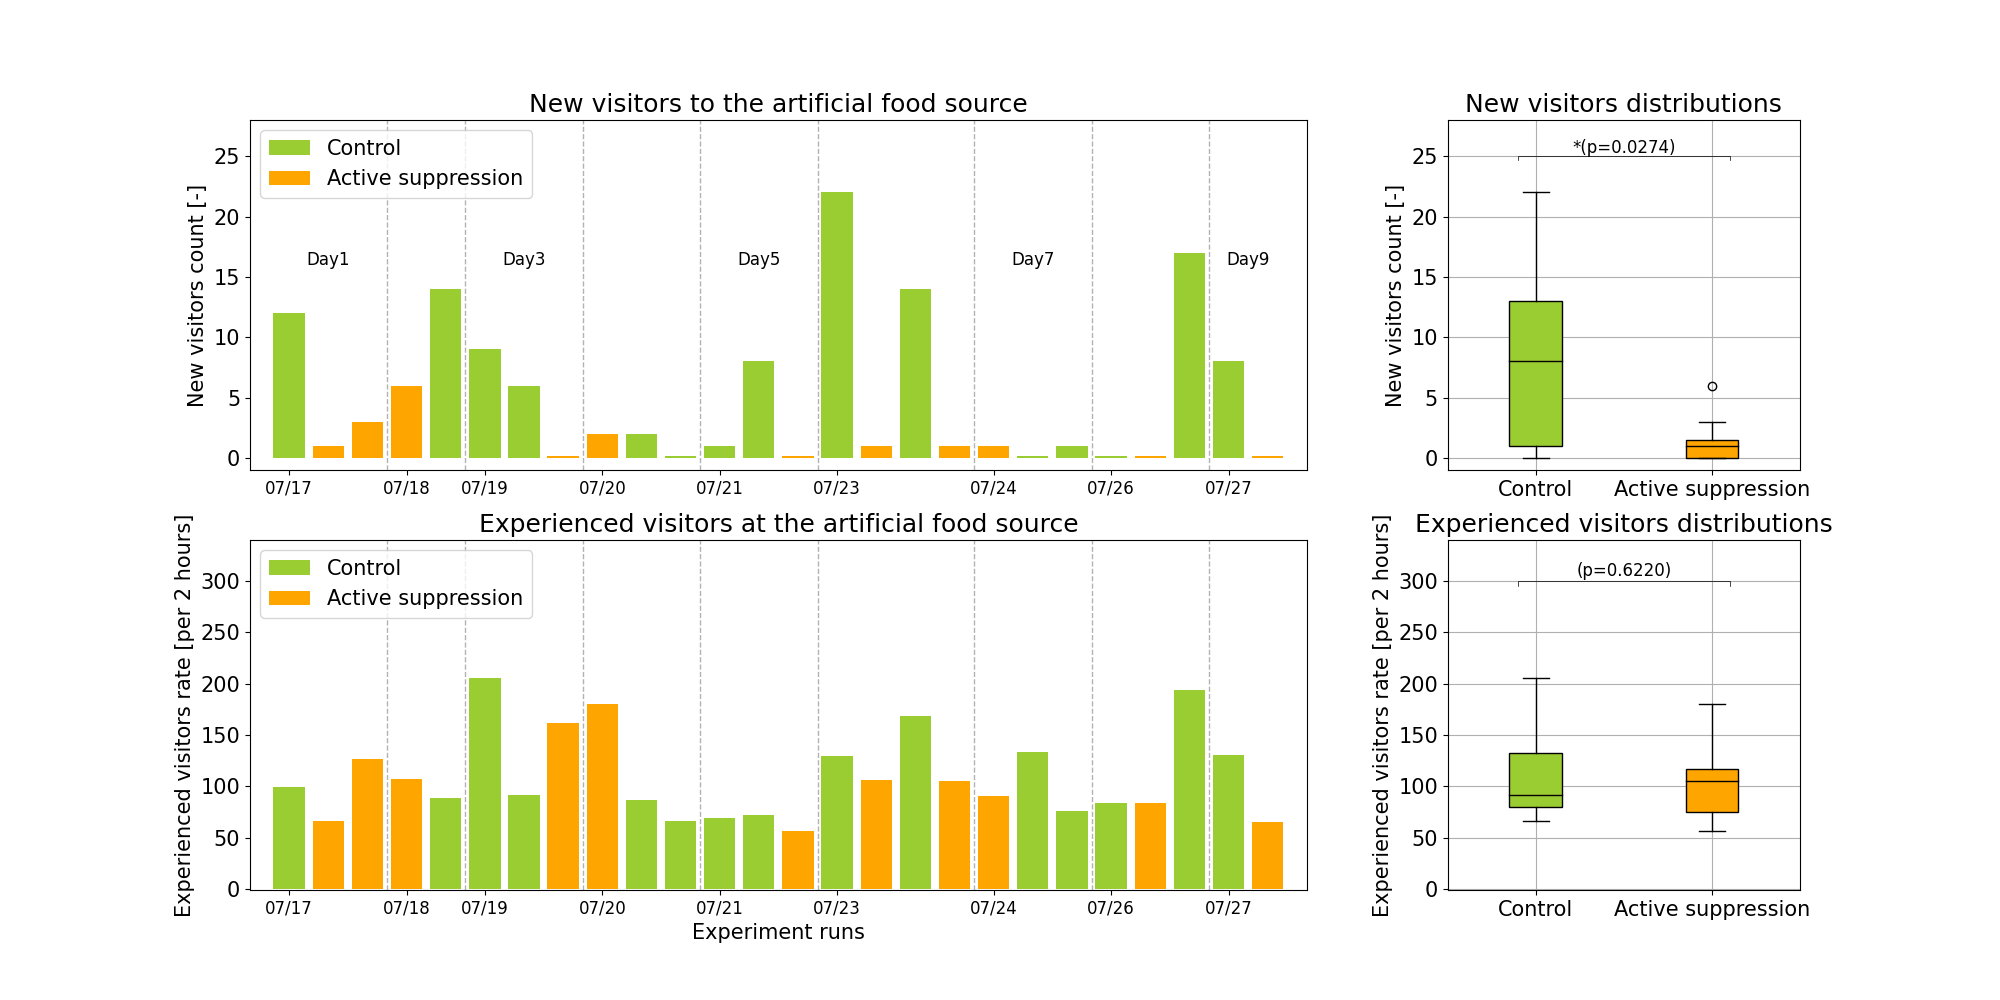

In [14]:
matplotlib.rcParams.update({'font.size': 15})

fig, ax = matplotlib.pyplot.subplots(2, 2, figsize=(20,10), height_ratios=[50, 50], width_ratios=[75, 25])#, constrained_layout=True)

DAYS_DISPLAY_PLOT   = True
DAYS_DISPLAY_AXES   = True 

ZERO_LEVEL_DISPLAY  = 0.2
ROTATION_TIMES      = 0
TICKS_HIDING_CT     = 2

COLOR_CONTROL       = 'yellowgreen'
COLOR_VIBS          = 'orange'
COLORMAP_GRAD       = matplotlib.colors.LinearSegmentedColormap.from_list("Custom", [COLOR_CONTROL, COLOR_VIBS], N=30)

VLINES_COLOR        = 'k'
VLINES_ALPHA        = 0.3
VLINES_LW           = 1
VLINES_LS           = 'dashed'
TEXT_DAY_OFFSET_X   = 0
TEXT_DAY_OFFSET_Y   = -12

YLIM_RECRUITS   = [-1, 28]
YLIM_VISITS     = [-1, 340]

XLIM_EXP        = [0, 27]
XLIM_BP         = [-0.1, 1.1]

## Recruitment all
data_cleaned_show0 = data_cleaned.copy()
# extract data
data_cleaned_show0.loc[:, 'recruits'] = data_cleaned_show0.loc[:, 'recruits'].replace(0, ZERO_LEVEL_DISPLAY)
# colors and legend
colors = [COLOR_CONTROL if x.type==0 else COLOR_VIBS for _, x in data_cleaned_show0.iterrows()]
labels = ['Control', 'Active suppression'] + ['_'+x for x in data_cleaned_show0.type_hr.values][2:]
# plot
_ = ax[0,0].bar(data_cleaned_show0.exp_re_nb, data_cleaned_show0.recruits, color=colors, label=labels)
# ticks
_ = ax[0,0].set_xticks(data_cleaned_show0.exp_re_nb.values)
_ = ax[0,0].set_xticklabels([str(x) for x in data_cleaned_show0.trial_id], rotation=ROTATION_TIMES, size=12)
# _ = ax[0,0].set_xticklabels([x.strftime("%m-%dT%H:%M") for x in data_cleaned_show0.dtts_start], rotation=ROTATION_TIMES)
# _ = [x.label1.set_visible(False) for x_id, x in enumerate(ax[0,0].xaxis.get_major_ticks()) if (x_id+1)%TICKS_HIDING_CT==0]
# Day lines
day_separator_pos = [x-0.5 for x in data_cleaned[data_cleaned.trial_id == 1].exp_re_nb]
_ = ax[0,0].vlines(day_separator_pos[1:], YLIM_RECRUITS[0], YLIM_RECRUITS[1], color=VLINES_COLOR, alpha=VLINES_ALPHA, linestyles=VLINES_LS, linewidths=VLINES_LW)
if DAYS_DISPLAY_PLOT:
    day_tags_pos = [(x+day_separator_pos[k+1])/2 if (k < len(day_separator_pos)-1) else (x+data_cleaned.trial_id.iloc[-1]/2) for k,x in enumerate(day_separator_pos) ]
    _ = [ax[0,0].text(tag_pos+TEXT_DAY_OFFSET_X, YLIM_RECRUITS[1]+TEXT_DAY_OFFSET_Y, 'Day'+str(tp_id+1), ha='center', size=12) for tp_id, tag_pos in enumerate(day_tags_pos) if tp_id in [0,2,4,6,8]]

# boxplot
bplot = ax[0,1].boxplot([data_cleaned[data_cleaned.type == 0].recruits, data_cleaned[data_cleaned.type == 1].recruits], labels=['Control', 'Active suppression'], patch_artist=True, widths=0.30, medianprops=dict(color='black'))
bplot['boxes'][0].set_facecolor(COLOR_CONTROL)
bplot['boxes'][1].set_facecolor(COLOR_VIBS)

## Visits
# plot
_ = ax[1,0].bar(data_cleaned_show0.exp_re_nb, data_cleaned_show0.visits, color=colors, label=labels)
# ticks
_ = ax[1,0].set_xticks(data_cleaned_show0.exp_re_nb.values)
_ = ax[1,0].set_xticklabels([str(x) for x in data_cleaned_show0.trial_id], rotation=ROTATION_TIMES, size=12)
if DAYS_DISPLAY_AXES:
    day_tags = range(1,10)
    ticks = [x.exp_re_nb for x_i, x in data_cleaned_show0.iterrows() if x.trial_id == 1]
    tickslabels = [datetime.datetime.strftime(x['dt'], format="%m/%d") for x_i, x in data_cleaned_show0.iterrows() if x.trial_id == 1]
    _ = ax[0,0].set_xticks(ticks)
    _ = ax[0,0].set_xticklabels(tickslabels, rotation=ROTATION_TIMES)
    _ = ax[1,0].set_xticks(ticks)
    _ = ax[1,0].set_xticklabels(tickslabels, rotation=ROTATION_TIMES)

# Day lines
_ = ax[1,0].vlines(day_separator_pos[1:], YLIM_VISITS[0], YLIM_VISITS[1], color=VLINES_COLOR, alpha=VLINES_ALPHA, linestyles=VLINES_LS, linewidths=VLINES_LW)
# boxplot
bplot = ax[1,1].boxplot([data_cleaned[data_cleaned.type == 0].visits, data_cleaned[data_cleaned.type == 1].visits], labels=['Control', 'Active suppression'], patch_artist=True, widths=0.30, medianprops=dict(color='black'))
bplot['boxes'][0].set_facecolor(COLOR_CONTROL)
bplot['boxes'][1].set_facecolor(COLOR_VIBS)



# # Titles 
_ = ax[0,0].title.set_text('New visitors to the artificial food source')
_ = ax[1,0].title.set_text('Experienced visitors at the artificial food source')

RStest_all_rec = scipy.stats.ranksums(data_cleaned[data_cleaned.type == 1].recruits, data_cleaned[data_cleaned.type == 0].recruits)
RStest_all_vis = scipy.stats.ranksums(data_cleaned[data_cleaned.type == 1].visits, data_cleaned[data_cleaned.type == 0].visits)

_ = ax[0,1].title.set_text('New visitors distributions')
_ = ax[1,1].title.set_text('Experienced visitors distributions')


# # Axis names
_ = ax[1,0].set_xlabel('Experiment runs')

_ = ax[0,0].set_ylabel('New visitors count [-]')
_ = ax[1,0].set_ylabel('Experienced visitors rate [per 2 hours]')

_ = ax[0,1].set_ylabel('New visitors count [-]')
_ = ax[1,1].set_ylabel('Experienced visitors rate [per 2 hours]')

# # Axis limits
_ = ax[0,0].set_ylim(YLIM_RECRUITS)
_ = ax[0,1].set_ylim(YLIM_RECRUITS)
_ = ax[1,0].set_ylim(YLIM_VISITS)
_ = ax[1,1].set_ylim(YLIM_VISITS)

_ = ax[0,0].set_xlim(XLIM_EXP)
_ = ax[1,0].set_xlim(XLIM_EXP)

# # Legends
_ = ax[0,0].legend(loc='upper left')
_ = ax[1,0].legend(loc='upper left')

# # Grids
_ = ax[0,1].grid()
_ = ax[1,1].grid()

# significance bars
sb_level    = 25
sb_width    = 1.2
sb_height   = 0.35
sb_positions= [1.5]
_ = ax[0,1].plot([sb_positions[0]-sb_width/2, sb_positions[0]-sb_width/2, sb_positions[0]+sb_width/2, sb_positions[0]+sb_width/2], [sb_level-sb_height, sb_level, sb_level, sb_level-sb_height], 'k', linewidth=.5)
_ = ax[0,1].text(sb_positions[0], sb_level+0.3, '*(p={:1.4f})'.format(RStest_all_rec[1]), fontsize=12, horizontalalignment='center')


sb_level    = 300
sb_width    = 1.2
sb_height   = 5
sb_positions= [1.5]
_ = ax[1,1].plot([sb_positions[0]-sb_width/2, sb_positions[0]-sb_width/2, sb_positions[0]+sb_width/2, sb_positions[0]+sb_width/2], [sb_level-sb_height, sb_level, sb_level, sb_level-sb_height], 'k', linewidth=.5)
_ = ax[1,1].text(sb_positions[0], sb_level+5, '(p={:1.4f})'.format(RStest_all_vis[1]), fontsize=12, horizontalalignment='center')

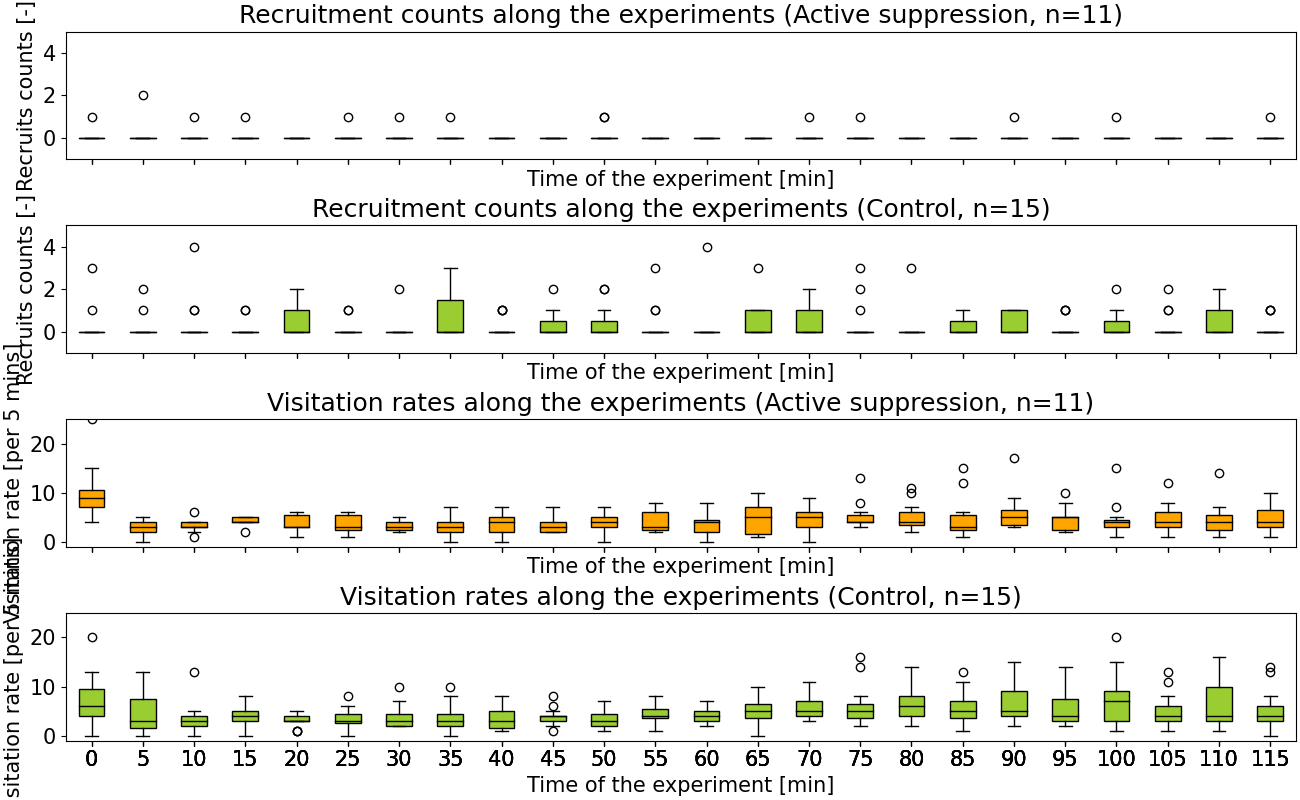

In [15]:
NB_5MINS_BINS   = 24
timeline_recruits = pandas.DataFrame.from_dict({'bin_nb':range(0,NB_5MINS_BINS)})
timeline_visits = pandas.DataFrame.from_dict({'bin_nb':range(0,NB_5MINS_BINS)})

for exp_id in list(data_cleaned.exp_nb.unique()):
    data_exp = data_clean[data_clean.Exp_id == exp_id]
    timeline_recruits['exp_{}'.format(exp_id)] = list(data_exp['recruits'])
    timeline_visits['exp_{}'.format(exp_id)] = list(data_exp['visits'])

# timeline_recruits.columns


bp_r_vibs = [[]]*NB_5MINS_BINS
bp_r_ctrl = [[]]*NB_5MINS_BINS
bp_v_vibs = [[]]*NB_5MINS_BINS
bp_v_ctrl = [[]]*NB_5MINS_BINS
for bin_i in range(NB_5MINS_BINS):
    for exp in list(timeline_recruits.columns):
        if exp == 'bin_nb':
            continue
        exp_id = int(exp.split('_')[-1])
        # print(data_cleaned[data_cleaned.exp_nb == exp_id].type_hr.values[0])
        if data_cleaned[data_cleaned.exp_nb == exp_id].type_hr.values[0] == 'Vibs':
            bp_r_vibs[bin_i] = bp_r_vibs[bin_i] + [int(timeline_recruits[exp].iloc[bin_i])]
            bp_v_vibs[bin_i] = bp_v_vibs[bin_i] + [int(timeline_visits[exp].iloc[bin_i])]
        else :
            bp_r_ctrl[bin_i] = bp_r_ctrl[bin_i] + [int(timeline_recruits[exp].iloc[bin_i])]
            bp_v_ctrl[bin_i] = bp_v_ctrl[bin_i] + [int(timeline_visits[exp].iloc[bin_i])]
# bp_r_vibs = numpy.array(bp_r_vibs)
# bp_r_ctrl = numpy.array(bp_r_ctrl)
# bp_v_vibs = numpy.array(bp_v_vibs)
# bp_v_ctrl = numpy.array(bp_v_ctrl)

fig, ax = matplotlib.pyplot.subplots(4, 1, figsize=(13,8), height_ratios=[25, 25, 25, 25], constrained_layout=True, sharex=True)

MINUTES_BIN     = 10
BOUNDARIES_EXP  = [0, 12]

COLOR_REFERENCE_CONTROL = 'green'
COLOR_CONTROL           = 'yellowgreen'
COLOR_REFERENCE_VIBS    = 'coral'
COLOR_VIBS              = 'orange'


bplot = ax[0].boxplot(bp_r_vibs, positions=numpy.array(range(NB_5MINS_BINS)), labels=numpy.array(range(NB_5MINS_BINS))*5, patch_artist=True, medianprops=dict(color='black'))
_ = [bp.set_facecolor(COLOR_VIBS) for _, bp in enumerate(bplot['boxes'])]

bplot = ax[1].boxplot(bp_r_ctrl, positions=numpy.array(range(NB_5MINS_BINS)), labels=numpy.array(range(NB_5MINS_BINS))*5, patch_artist=True, medianprops=dict(color='black'))
_ = [bp.set_facecolor(COLOR_CONTROL) for _, bp in enumerate(bplot['boxes'])]

bplot = ax[2].boxplot(bp_v_vibs, positions=numpy.array(range(NB_5MINS_BINS)), labels=numpy.array(range(NB_5MINS_BINS))*5, patch_artist=True, medianprops=dict(color='black'))
_ = [bp.set_facecolor(COLOR_VIBS) for _, bp in enumerate(bplot['boxes'])]

bplot = ax[3].boxplot(bp_v_ctrl, positions=numpy.array(range(NB_5MINS_BINS)), labels=numpy.array(range(NB_5MINS_BINS))*5, patch_artist=True, medianprops=dict(color='black'))
_ = [bp.set_facecolor(COLOR_CONTROL) for _, bp in enumerate(bplot['boxes'])]

# Titles
_ = ax[0].title.set_text('Recruitment counts along the experiments (Active suppression, n={})'.format(len(bp_r_vibs[0])))
_ = ax[1].title.set_text('Recruitment counts along the experiments (Control, n={})'.format(len(bp_r_ctrl[0])))
_ = ax[2].title.set_text('Visitation rates along the experiments (Active suppression, n={})'.format(len(bp_v_vibs[0])))
_ = ax[3].title.set_text('Visitation rates along the experiments (Control, n={})'.format(len(bp_v_ctrl[0])))

# xlabels
_ = ax[0].set_xlabel('Time of the experiment [min]')
_ = ax[1].set_xlabel('Time of the experiment [min]')
_ = ax[2].set_xlabel('Time of the experiment [min]')
_ = ax[3].set_xlabel('Time of the experiment [min]')

# ylabels
_ = ax[0].set_ylabel('Recruits counts [-]')
_ = ax[1].set_ylabel('Recruits counts [-]')
_ = ax[2].set_ylabel('Visitation rate [per 5 mins]')
_ = ax[3].set_ylabel('Visitation rate [per 5 mins]')

# ylabels
# _ = ax[0].grid()
# _ = ax[1].grid()
# _ = ax[2].grid()
# _ = ax[3].grid()

# Axis lims
Y_LIM_R = [-1, 5]
Y_LIM_V = [-1, 25]
_ = ax[0].set_ylim(Y_LIM_R)
_ = ax[1].set_ylim(Y_LIM_R)
_ = ax[2].set_ylim(Y_LIM_V)
_ = ax[3].set_ylim(Y_LIM_V)


RanksumsResult(statistic=-1.0178076669978668, pvalue=0.30876936771440044)
RanksumsResult(statistic=-2.4679450334584123, pvalue=0.013589118465834996)
WilcoxonResult(statistic=8.0, pvalue=0.0244140625)
WilcoxonResult(statistic=0.0, pvalue=0.000978706525317055)


/Users/matthieu/.pyenv/versions/3.9.15/envs/default_conf/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


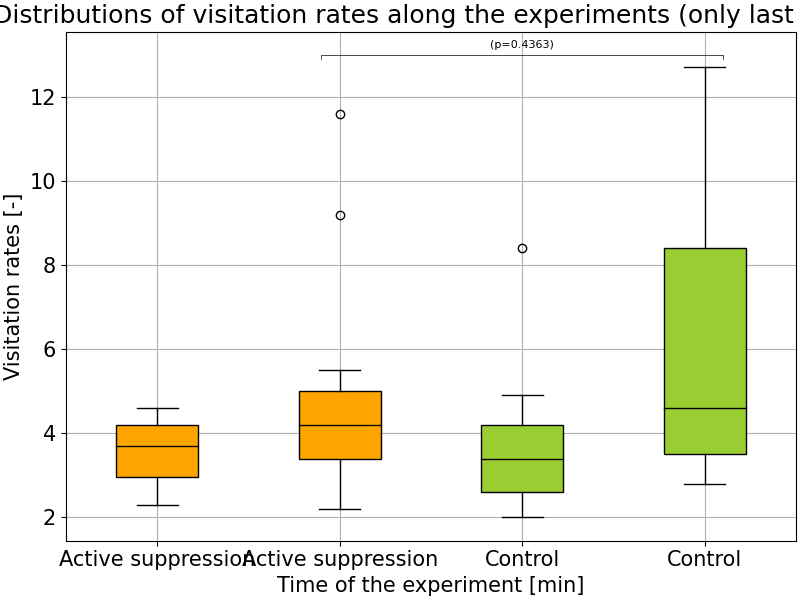

In [36]:
fig, ax = matplotlib.pyplot.subplots(1, 1, figsize=(8,6), constrained_layout=True, sharex=True)

MINUTES_BIN     = 10
BOUNDARIES_EXP  = [0, 12]

COLOR_REFERENCE_CONTROL = 'green'
COLOR_CONTROL           = 'yellowgreen'
COLOR_REFERENCE_VIBS    = 'coral'
COLOR_VIBS              = 'orange'

EXP_LENGTH = 10
EXP_START = 2
all_vibs_1st_hour = numpy.array(bp_v_vibs)[EXP_START:EXP_START+EXP_LENGTH].mean(axis=0) # visits rates averaged over second hour for vibs exp
all_ctrl_1st_hour = numpy.array(bp_v_ctrl)[EXP_START:EXP_START+EXP_LENGTH].mean(axis=0) # visits rates averaged over second hour for vibs exp

all_vibs_2nd_hour = numpy.array(bp_v_vibs)[24-EXP_LENGTH:].mean(axis=0) # visits rates averaged over second hour for vibs exp
all_ctrl_2nd_hour = numpy.array(bp_v_ctrl)[24-EXP_LENGTH:].mean(axis=0) # visits rates averaged over second hour for ctrl exp
bplot = ax.boxplot([all_vibs_1st_hour, all_vibs_2nd_hour, all_ctrl_1st_hour, all_ctrl_2nd_hour], positions=[1, 2, 3, 4], labels=['Active suppression', 'Active suppression', 'Control', 'Control'], patch_artist=True, medianprops=dict(color='black'))
_ = [bp.set_facecolor(COLOR_VIBS) for bp_i, bp in enumerate(bplot['boxes'])]
_ = [bp.set_facecolor(COLOR_CONTROL) for bp_i, bp in enumerate(bplot['boxes']) if bp_i > 1]

# Titles
_ = ax.title.set_text('Distributions of visitation rates along the experiments (only last hour)')

# xlabels
_ = ax.set_xlabel('Time of the experiment [min]')

# ylabels
_ = ax.set_ylabel('Visitation rates [-]')

# ylabels
_ = ax.grid()

# Axis lims
Y_LIM_V = [-1, 14]
# _ = ax.set_ylim(Y_LIM_V)

RS_test = scipy.stats.ranksums(all_vibs_2nd_hour, all_ctrl_2nd_hour)
RS_vibs = scipy.stats.ranksums(all_vibs_1st_hour, all_vibs_2nd_hour)
RS_ctrl = scipy.stats.ranksums(all_ctrl_1st_hour, all_ctrl_2nd_hour)

# print(RS_test)
print(RS_vibs)
print(RS_ctrl)

# print(all_ctrl_1st_hour - all_ctrl_2nd_hour)
print(scipy.stats.wilcoxon(all_vibs_1st_hour, all_vibs_2nd_hour))
print(scipy.stats.wilcoxon(all_ctrl_1st_hour, all_ctrl_2nd_hour))

sb_level    = 13
sb_width    = 2.2
sb_height   = 0.1
sb_positions= [3]
_ = ax.plot([sb_positions[0]-sb_width/2, sb_positions[0]-sb_width/2, sb_positions[0]+sb_width/2, sb_positions[0]+sb_width/2], [sb_level-sb_height, sb_level, sb_level, sb_level-sb_height], 'k', linewidth=.5)
_ = ax.text(sb_positions[0], sb_level+0.15, '(p={:1.4f})'.format(RS_test[1]), fontsize=8, horizontalalignment='center')


In [35]:
all_ctrl_1st_hour.shape

(150,)

In [18]:
numpy.array(bp_v_vibs)[2:10].mean(axis=0)

array([2.625, 3.25 , 3.875, 4.125, 4.625, 2.125, 4.375, 3.875, 3.75 ,
       3.375, 2.625])

In [19]:
numpy.array(bp_v_ctrl)[14:].shape

(10, 15)

In [20]:
bp_v_ctrl

[[8, 0, 20, 10, 13, 6, 6, 1, 3, 5, 2, 9, 6, 7, 10],
 [9, 7, 13, 3, 13, 2, 1, 0, 4, 2, 3, 7, 1, 8, 1],
 [4, 2, 5, 3, 2, 3, 0, 1, 3, 2, 5, 2, 3, 13, 4],
 [4, 3, 6, 5, 4, 4, 2, 0, 1, 3, 3, 4, 5, 8, 5],
 [4, 1, 4, 1, 3, 1, 3, 4, 4, 4, 5, 3, 3, 5, 3],
 [6, 3, 1, 0, 6, 3, 4, 2, 3, 5, 2, 3, 3, 8, 4],
 [4, 2, 4, 2, 3, 2, 2, 2, 4, 5, 2, 3, 5, 10, 7],
 [2, 3, 4, 1, 2, 2, 0, 3, 3, 8, 7, 3, 5, 10, 4],
 [1, 6, 5, 3, 3, 1, 5, 1, 2, 5, 4, 1, 3, 8, 4],
 [6, 4, 4, 1, 3, 3, 5, 3, 3, 4, 2, 2, 4, 8, 4],
 [2, 4, 3, 3, 2, 2, 2, 4, 2, 5, 6, 3, 1, 7, 5],
 [4, 6, 8, 1, 5, 4, 2, 4, 4, 8, 4, 3, 3, 7, 4],
 [7, 4, 7, 4, 3, 2, 5, 4, 5, 3, 4, 3, 5, 5, 3],
 [3, 5, 8, 6, 3, 0, 5, 4, 7, 10, 5, 4, 3, 8, 5],
 [3, 5, 9, 4, 3, 4, 4, 7, 10, 6, 5, 4, 3, 11, 7],
 [7, 5, 14, 5, 3, 5, 2, 3, 8, 5, 4, 4, 2, 16, 6],
 [6, 6, 12, 4, 2, 4, 4, 5, 10, 9, 7, 4, 3, 14, 6],
 [6, 5, 11, 4, 1, 3, 3, 2, 9, 8, 6, 4, 5, 13, 6],
 [3, 4, 15, 4, 11, 4, 4, 5, 9, 11, 6, 2, 7, 9, 5],
 [4, 2, 14, 4, 5, 3, 3, 2, 6, 9, 12, 5, 3, 4, 10],
 [3, 8, 15, 8, 

In [21]:
bp_v_vibs

[[7, 25, 15, 11, 5, 10, 8, 7, 9, 9, 4],
 [4, 4, 3, 2, 0, 2, 5, 4, 3, 4, 1],
 [3, 2, 6, 3, 4, 3, 3, 4, 4, 1, 3],
 [4, 2, 4, 4, 5, 4, 5, 4, 5, 4, 5],
 [1, 3, 3, 6, 4, 3, 3, 6, 5, 6, 2],
 [2, 5, 3, 1, 6, 1, 6, 6, 5, 3, 3],
 [4, 2, 5, 2, 4, 3, 4, 3, 4, 3, 2],
 [3, 4, 0, 5, 4, 1, 7, 2, 2, 3, 3],
 [2, 4, 5, 5, 7, 0, 5, 4, 2, 3, 1],
 [2, 4, 5, 7, 3, 2, 2, 2, 3, 4, 2],
 [3, 4, 3, 5, 0, 3, 5, 7, 5, 4, 1],
 [2, 5, 7, 3, 8, 3, 3, 8, 2, 2, 4],
 [2, 4, 3, 8, 7, 0, 5, 4, 2, 4, 1],
 [1, 8, 4, 10, 7, 1, 5, 6, 7, 1, 2],
 [2, 5, 6, 9, 6, 2, 5, 4, 6, 4, 0],
 [5, 5, 4, 13, 8, 3, 6, 4, 4, 4, 3],
 [3, 7, 4, 10, 11, 3, 5, 5, 4, 4, 2],
 [2, 6, 3, 12, 15, 1, 5, 5, 2, 3, 3],
 [3, 7, 6, 9, 17, 3, 3, 6, 4, 5, 5],
 [2, 5, 5, 10, 8, 2, 2, 4, 5, 5, 3],
 [3, 4, 5, 7, 15, 2, 1, 4, 3, 4, 4],
 [3, 6, 4, 8, 12, 1, 5, 1, 4, 3, 6],
 [3, 4, 6, 7, 14, 2, 5, 4, 1, 1, 3],
 [4, 6, 1, 7, 10, 3, 8, 5, 3, 4, 3]]

In [22]:
data_cleaned

,exp_nb,dt,dtts_start,dtts_stop,type,type_hr,duration,count_agregation,visits,removed,recruits,exp_re_nb,trial_id
0,1,2023-07-17 00:00:00+00:00,2023-07-17 09:10:00+00:00,2023-07-17 11:10:00+00:00,0,Ctrl,0 days 02:00:00,24,99,20,12,1,1
1,2,2023-07-17 00:00:00+00:00,2023-07-17 11:10:00+00:00,2023-07-17 13:10:00+00:00,1,Vibs,0 days 02:00:00,24,66,10,1,2,2
2,3,2023-07-17 00:00:00+00:00,2023-07-17 16:40:00+00:00,2023-07-17 18:40:00+00:00,1,Vibs,0 days 02:00:00,24,127,58,3,3,3
3,4,2023-07-18 00:00:00+00:00,2023-07-18 09:10:00+00:00,2023-07-18 11:10:00+00:00,1,Vibs,0 days 02:00:00,24,107,22,6,4,1
4,5,2023-07-18 00:00:00+00:00,2023-07-18 11:40:00+00:00,2023-07-18 13:40:00+00:00,0,Ctrl,0 days 02:00:00,24,89,36,14,5,2
5,6,2023-07-19 00:00:00+00:00,2023-07-19 10:00:00+00:00,2023-07-19 12:00:00+00:00,0,Ctrl,0 days 02:00:00,24,206,47,9,6,1
6,7,2023-07-19 00:00:00+00:00,2023-07-19 12:10:00+00:00,2023-07-19 14:10:00+00:00,0,Ctrl,0 days 02:00:00,24,92,36,6,7,2
7,8,2023-07-19 00:00:00+00:00,2023-07-19 14:20:00+00:00,2023-07-19 16:20:00+00:00,1,Vibs,0 days 02:00:00,24,162,13,0,8,3
8,9,2023-07-20 00:00:00+00:00,2023-07-20 09:10:00+00:00,2023-07-20 11:10:00+00:00,1,Vibs,0 days 02:00:00,24,180,18,2,9,1
9,10,2023-07-20 00:00:00+00:00,2023-07-20 11:20:00+00:00,2023-07-20 13:20:00+00:00,0,Ctrl,0 days 02:00:00,24,87,34,2,10,2
